## Portfolio Backtester
### Performs Portfolio Backtesting

Proxy Symbol	Asset Class
------------	------------------------------
vigrx	Growth Stocks
vivax	Value Stocks
vfinx	Large Cap
vimsx	Mid Cap
vgsix	REIT
vfstx	Short-term Bonds
vwehx	ETD
gcf	Gold


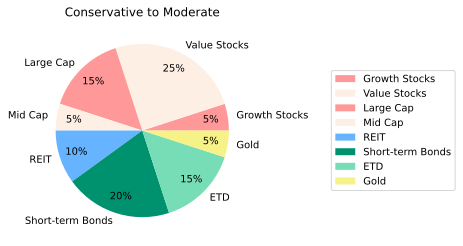

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\migue\\Desktop\\Alpha Circle - Work\\portfolio-backtester\\output/Conservative to Moderate.svg'

<Figure size 432x288 with 0 Axes>

In [2]:
"""
Created on Thu Mar  3 21:31:44 2022

@author: Nick
"""
# Execute below magic functions in Jupyter Notebook to resolve the "cannot show the figure" warning
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import bt
import matplotlib.pyplot as plt

def plot_pie(weight, title, show_legend):
    # Prepare data to plot pie chart
    labels = []
    data = []
    colors = []
    for k, v in weight.items():
        if v != 0:
            labels.append(assets[k]['name'])
            data.append(v)
            colors.append(assets[k]['color'])

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect='equal'))
    wedges, texts, autotexts = ax.pie(data, labels=labels, colors=colors, 
                                      autopct='%1.0f%%', pctdistance=0.8)
    if show_legend:
        ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1.35, 0, 1 ,1))
    ax.set_title(title)
    plt.show()
    plt.savefig(r'C:\Users\migue\Desktop\Alpha Circle - Work\portfolio-backtester\output\output'+title+'.svg', format='svg')


assets = {
    'vigrx': {'name': 'Growth Stocks', 'asset_class': 'Stocks', 'symbol': 'VIGRX', 'color': '#FF9999'},
    'vivax': {'name': 'Value Stocks', 'asset_class': 'Stocks', 'symbol': 'VIVAX', 'color': '#FEEFE5'},
    'vfinx': {'name': 'Large Cap', 'asset_class': 'Stocks', 'symbol': 'VFINX', 'color': '#FF9999'},
    'vimsx': {'name': 'Mid Cap', 'asset_class': 'Stocks', 'symbol': 'VIMSX', 'color': '#FEEFE5'},
    'vgsix': {'name': 'REIT', 'asset_class': 'Stocks', 'symbol': 'VGSIX', 'color': '#66B3FF'},
    'vfstx': {'name': 'Short-term Bonds', 'asset_class': 'Bonds', 'symbol': 'VFSTX', 'color': '#00916E'},
    'vwehx': {'name': 'ETD', 'asset_class': 'Bonds', 'symbol': 'VWEHX', 'color': '#76DDB7'},
    'gcf'  : {'name': 'Gold', 'asset_class': 'Commodity', 'symbol': 'GC=F', 'color': '#F7F288'},
    }
    
tickers = []
for k, v in assets.items():
    tickers.append(v['symbol'])
 
prices = bt.get(tickers, start='2021-01-01', end='2022-02-28')

weight_1 = {'vigrx':0.05,'vivax':0.25,'vfinx':0.15,'vimsx':0.05,'vgsix':0.1,'vfstx':0.2,'vwehx':0.15,'gcf':0.05}
strategy_name_1 = 'Conservative to Moderate'
strategy_1 = bt.Strategy(strategy_name_1, [
    bt.algos.RunYearly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight_1),
    bt.algos.Rebalance()])
backtest_1 = bt.Backtest(strategy_1, prices, initial_capital=1000000.0)

weight_2 = {'vigrx':0.0,'vivax':0.3,'vfinx':0.05,'vimsx':0.0,'vgsix':0.15,'vfstx':0.25,'vwehx':0.2,'gcf':0.05}
strategy_name_2 = 'Conservative'
strategy_2 = bt.Strategy(strategy_name_2, [
    bt.algos.RunYearly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight_2),
    bt.algos.Rebalance()])
backtest_2 = bt.Backtest(strategy_2, prices, initial_capital=1000000.0)

weight_3 = {'vigrx':0.1,'vivax':0.25,'vfinx':0.2,'vimsx':0.05,'vgsix':0.1,'vfstx':0.15,'vwehx':0.1,'gcf':0.05}
strategy_name_3 = 'Moderate'
strategy_3 = bt.Strategy(strategy_name_3, [
    bt.algos.RunYearly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight_3),
    bt.algos.Rebalance()])
backtest_3 = bt.Backtest(strategy_3, prices, initial_capital=1000000.0)

res = bt.run(backtest_2, backtest_1, backtest_3)

print('Proxy Symbol\tAsset Class')
print('------------\t------------------------------')
for k, v in weight_1.items():
    print(k+'\t'+assets[k]['name'])

# Plot Allocation Pie charts
plot_pie(weight=weight_1, title=strategy_name_1, show_legend=True)
plot_pie(weight=weight_2, title=strategy_name_2, show_legend=False)
plot_pie(weight=weight_3, title=strategy_name_3, show_legend=False)

# Portfolio Performance Chart
res.plot(figsize=(11,6), grid=True, title='Portfolio Growth')

print('')
print('Performance Summary')
print('===================\n')
rf = 0.01
res.backtests[strategy_name_1].stats.set_riskfree_rate(rf)
res.backtests[strategy_name_1].stats.display()
